# Getting Data

In [1]:
%%writefile kaggle.json
{"username":"rushikeshdarge","key":"*********************************"}

Writing kaggle.json


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c learn-ai-bbc
! unzip /content/learn-ai-bbc.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/1.85M [00:00<?, ?B/s]
100% 1.85M/1.85M [00:00<00:00, 150MB/s]
Archive:  /content/learn-ai-bbc.zip
  inflating: BBC News Sample Solution.csv  
  inflating: BBC News Test.csv       
  inflating: BBC News Train.csv      


In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [4]:
df = pd.read_csv('/content/BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
df.shape

(1490, 3)

In [6]:
df.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [7]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [8]:
df.Text.sample(10)

1305    microsoft releases bumper patches microsoft ha...
1271    ray dvd beats box office takings oscar-nominat...
760     doors open at biggest gadget fair thousands of...
424     deutsche attacks yukos case german investment ...
37      yachvili savours france comeback france scrum-...
837     pop band busted to  take a break  chart-toppin...
488     wales hails new superstar one game into his si...
126     gallery unveils interactive tree a christmas t...
580     warning over us pensions deficit taxpayers may...
998     robinson ready for difficult task england coac...
Name: Text, dtype: object

In [9]:
X = df.Text
y = df.Category

# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1341,), (149,), (1341,), (149,))

# Pre-Processing

In [11]:
def only_alpha(text):
    return re.sub('[^A-Za-z0-9 ]+', '', text)

In [12]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

In [13]:
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    text = text.split(' ')
    output= [i for i in text if i not in stopwords]
    return ' '.join(output)

In [15]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    text = text.split(' ')
    stem_text = [porter_stemmer.stem(word) for word in text]
    return ' '.join(stem_text)

In [16]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    text = text.split(' ')
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return ' '.join(lemm_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [17]:
def all_preprocessing(text_df):    
    text_df = text_df.apply(lambda x : only_alpha(x))
    text_df = text_df.apply(lambda x : x.lower())
    text_df = text_df.apply(lambda x : decontractions(x))
    text_df = text_df.apply(lambda x:remove_stopwords(x))
    text_df = text_df.apply(lambda x: stemming(x))
    text_df = text_df.apply(lambda x:lemmatizer(x))
    return text_df

In [18]:
process_train = all_preprocessing(X_train)
process_test = all_preprocessing(X_test)

## TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(process_train.values)
X_test_tf = vectorizer.transform(process_test.values)
X_train_tf

<1341x18762 sparse matrix of type '<class 'numpy.float64'>'
	with 195598 stored elements in Compressed Sparse Row format>

In [20]:
import pickle
# save the model to disk
filename = 'tfidf_vector.model'
pickle.dump(vectorizer, open(filename, 'wb'))

In [20]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data = tsne_model.fit_transform(X_train_tf)

In [21]:
# create a dataframe from tsne
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))

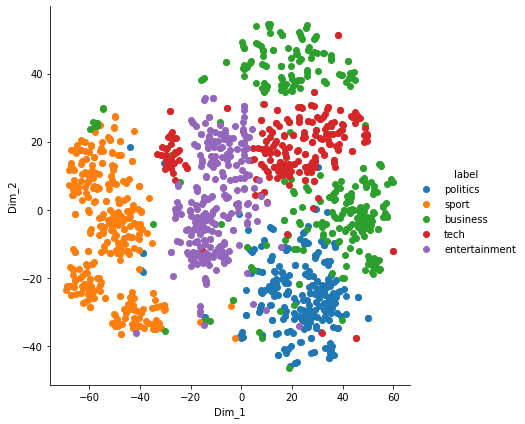

In [22]:
# plot tsne of tf-idf
sns.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_tr = le.transform(y_train)
y_test_tr = le.transform(y_test)

# Machine Learning Models

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [25]:
X_test_tf

<149x18762 sparse matrix of type '<class 'numpy.float64'>'
	with 21293 stored elements in Compressed Sparse Row format>

Training score of model is 1.0
               precision    recall  f1-score   support

     business       0.83      0.83      0.83        42
entertainment       0.92      0.92      0.92        24
     politics       0.81      0.75      0.78        28
        sport       0.93      0.96      0.94        26
         tech       0.77      0.79      0.78        29

     accuracy                           0.85       149
    macro avg       0.85      0.85      0.85       149
 weighted avg       0.85      0.85      0.85       149



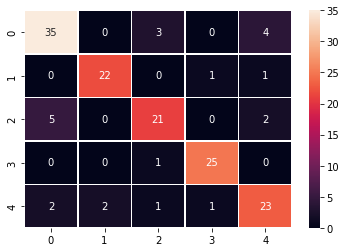

In [26]:
dt_clf = DecisionTreeClassifier(random_state=0).fit(X_train_tf, y_train_tr)
print('Training score of model is',dt_clf.score(X_train_tf, y_train_tr))
y_pred = dt_clf.predict(X_test_tf)
print(classification_report(y_test_tr, y_pred, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test_tr, y_pred), annot=True, linewidths=.5)
plt.show()

Training score of model is 0.9970171513795675
               precision    recall  f1-score   support

     business       0.98      1.00      0.99        42
entertainment       1.00      1.00      1.00        24
     politics       1.00      0.96      0.98        28
        sport       0.96      1.00      0.98        26
         tech       1.00      0.97      0.98        29

     accuracy                           0.99       149
    macro avg       0.99      0.99      0.99       149
 weighted avg       0.99      0.99      0.99       149



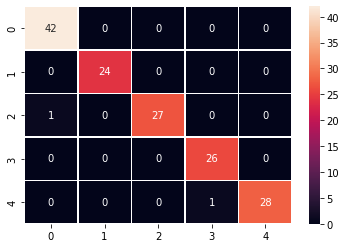

In [27]:
clf = LogisticRegression(random_state=0).fit(X_train_tf, y_train_tr)
print('Training score of model is',clf.score(X_train_tf, y_train_tr))
y_pred = clf.predict(X_test_tf)
print(classification_report(y_test_tr, y_pred, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test_tr, y_pred), annot=True, linewidths=.5)
plt.show()

In [70]:
# ref : https://www.geeksforgeeks.org/saving-a-machine-learning-model/
import pickle
# save the model to disk
filename = 'logistic_regression.model'
pickle.dump(clf, open(filename, 'wb'))
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [28]:
new_news = '''Wipro: The IT major reported a 21 per cent decline in its June quarter net profit as higher employee-related costs pushed up the firm's overall expenses. Consolidated net profit at Rs 2,563.6 crore in April-June was 20.6 per cent, lower than Rs 3,242.6 crore net profit in the same period a year back.
NTPC: The state-owned power giant has inked a pact with Moroccan Agency for Sustainable Energy (MASEN) for cooperation in renewable energy. It signed an MoU with MASEN for cooperation in the renewable energy sector during the 17th CII EXIM Conclave on India Africa Growth Partnership held in New Delhi from 19th-20th July 2022.'''

In [29]:
pre_news = all_preprocessing(pd.Series(new_news))
vec_news = vectorizer.transform(pre_news)
news_pred = clf.predict(vec_news)
print('New news classified as {0} category'.format(le.classes_[news_pred][0]))

New news classified as business category


## Prepare data for model

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
token = Tokenizer(num_words=10000, oov_token='unk')
token.fit_on_texts(process_train.values)
data_xtrain = token.texts_to_sequences(process_train.values)
data_xtest = token.texts_to_sequences(process_test.values)

In [32]:
# saving tokenizer for deploying model
# ref : https://stackoverflow.com/a/45737582
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(token, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     token = pickle.load(handle)

In [33]:
print('Number of unique words',len(token.word_index.keys()))

Number of unique words 18792


Text(0.5, 0, 'length')

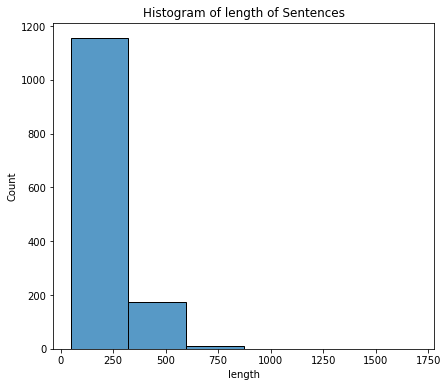

In [34]:
leng = [len(ele) for ele in data_xtrain]
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.histplot(leng, bins=6)
plt.title("Histogram of length of Sentences")
plt.xlabel("length")

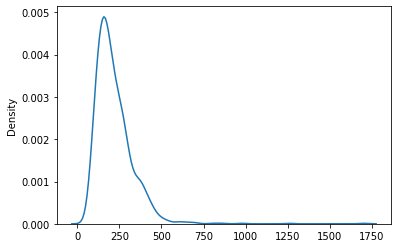

In [35]:
sns.kdeplot(leng)

In [36]:
for i in np.arange(0.1,1.1,0.1):
    print('{0} Quantile is {1}'.format(int(i*100),np.quantile(leng, i)))

10 Quantile is 113.0
20 Quantile is 135.0
30 Quantile is 154.0
40 Quantile is 173.0
50 Quantile is 193.0
60 Quantile is 218.0
70 Quantile is 252.0
80 Quantile is 287.0
90 Quantile is 360.0
100 Quantile is 1695.0


* We take 85 Quantile as words which is approx 300

In [37]:
max_len = 300
# padding
data_xtrain_pad = pad_sequences(data_xtrain, maxlen=max_len, padding='post', dtype='int32')
data_xtest_pad = pad_sequences(data_xtest, maxlen=max_len, padding='post', dtype='int32')

In [38]:
data_xtrain_pad.shape

(1341, 300)

In [39]:
index = 50
print('text: ',X_train[0][:index])
print('\n text to num: ',data_xtrain[0][:index])
print('\n num to padded: ',data_xtrain_pad[0][:index])

text:  worldcom ex-boss launches defence lawyers defendin

 text to num:  [1105, 806, 108, 4493, 1105, 806, 171, 693, 724, 2965, 8, 23, 198, 1656, 462, 749, 524, 4493, 471, 7137, 773, 1355, 4, 598, 749, 7138, 2015, 239, 556, 229, 565, 2, 33, 192, 133, 433, 102, 1105, 806, 821, 1400, 119, 40, 4494, 240, 171, 14, 625, 351, 422]

 num to padded:  [  67 1125 2968 2021   26  108    8   13   70  214  391 6158   96  119
   39 1384  109 1105  806   92  192  255  806  610    8   40  725  806
  456  836   92    1 2845  239  107   29 1659 2532   82   29  314    4
  410 3107  507  500  456  726  774   54]


# Deep Learning Model

In [40]:
from tensorflow.keras.layers import Embedding, LSTM, Input, Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.models import Model

In [41]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y_train_class = lenc.fit_transform(y_train)
y_test_class = lenc.transform(y_test)

y_train_class = to_categorical(y_train_class, num_classes=5)

In [42]:
data_xtrain_pad.shape

(1341, 300)

In [43]:
embed_input = len(token.word_index.keys()) + 1

In [55]:
input = Input(shape=(max_len,))
embed = Embedding(embed_input, 100)(input)
lstm1 = LSTM(100, return_sequences=True, return_state=False)(embed)
lstm2 = LSTM(64, dropout=0.2)(lstm1)
dense1 = Dense(64)(lstm2)
drop1 = Dropout(0.3)(dense1)
dense2 = Dense(24)(drop1)
dense3 = Dense(5, activation='softmax')(dense2)

model = Model(inputs=input, outputs=dense3)

In [56]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 300, 100)          1879300   
                                                                 
 lstm_6 (LSTM)               (None, 300, 100)          80400     
                                                                 
 lstm_7 (LSTM)               (None, 64)                42240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 24)                1560

In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_accuracy', verbose=1, patience=3)

history = model.fit(data_xtrain_pad, y_train_class, validation_split=0.1, epochs=70, use_multiprocessing=True)

Epoch 1/70
38/38 [==============================] - 5s 51ms/step - loss: 1.5990 - accuracy: 0.2595 - val_loss: 1.5316 - val_accuracy: 0.3037
Epoch 2/70
38/38 [==============================] - 1s 28ms/step - loss: 1.5156 - accuracy: 0.2828 - val_loss: 1.3854 - val_accuracy: 0.3704
Epoch 3/70
38/38 [==============================] - 1s 28ms/step - loss: 1.3690 - accuracy: 0.3507 - val_loss: 1.4642 - val_accuracy: 0.3259
Epoch 4/70
38/38 [==============================] - 1s 29ms/step - loss: 1.3787 - accuracy: 0.3905 - val_loss: 1.5604 - val_accuracy: 0.3037
Epoch 5/70
38/38 [==============================] - 1s 29ms/step - loss: 1.2473 - accuracy: 0.3905 - val_loss: 1.3102 - val_accuracy: 0.3481
Epoch 6/70
38/38 [==============================] - 1s 28ms/step - loss: 1.2007 - accuracy: 0.4179 - val_loss: 1.1921 - val_accuracy: 0.3704
Epoch 7/70
38/38 [==============================] - 1s 29ms/step - loss: 1.1891 - accuracy: 0.4113 - val_loss: 1.2136 - val_accuracy: 0.4074
Epoch 8/70
38

In [58]:
model.save('news_model.h5')

## Testing performance of model

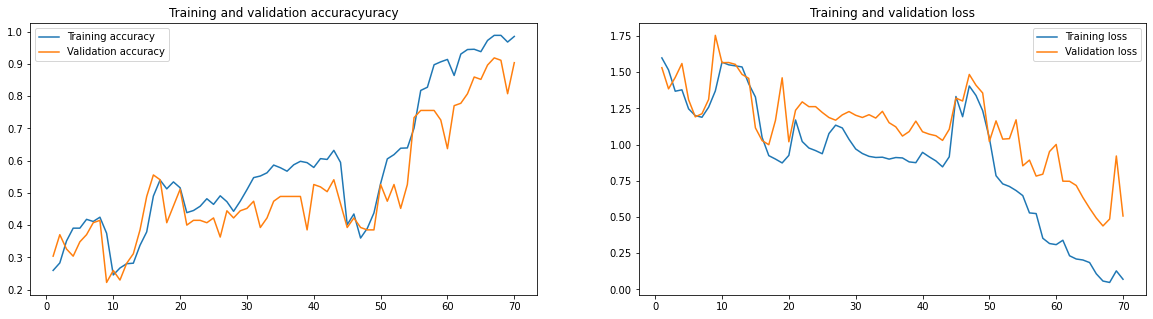

In [59]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.lineplot(epochs, accuracy, label='Training accuracy')
sns.lineplot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracyuracy')
plt.legend()


plt.subplot(122)
sns.lineplot(epochs, loss, label='Training loss')
sns.lineplot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [60]:
y_true = lenc.transform(y_test)
y_pred = model.predict(data_xtest_pad)
y_pred = np.argmax(y_pred,axis=1)

               precision    recall  f1-score   support

     business       0.97      0.74      0.84        42
entertainment       0.65      1.00      0.79        24
     politics       0.90      0.93      0.91        28
        sport       0.88      0.88      0.88        26
         tech       1.00      0.86      0.93        29

     accuracy                           0.87       149
    macro avg       0.88      0.88      0.87       149
 weighted avg       0.90      0.87      0.87       149



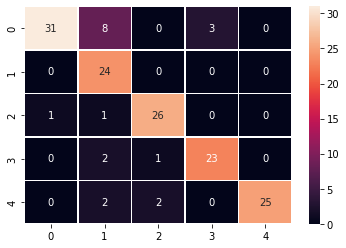

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = lenc.classes_
print(classification_report(y_true, y_pred, target_names=target_names))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, linewidths=.5)
plt.show()

In [65]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
Score_Table = PrettyTable(["Algo Name", "Accuracy"])
  
# Add rows
Score_Table.add_row(["Decision Tree", "85.0 %"])
Score_Table.add_row(["Logistic Regression", "99.00 %",])
Score_Table.add_row(["LSTM Model", "87.00 %"])\

print(Score_Table)

+---------------------+----------+
|      Algo Name      | Accuracy |
+---------------------+----------+
|    Decision Tree    |  85.0 %  |
| Logistic Regression | 99.00 %  |
|      LSTM Model     | 87.00 %  |
+---------------------+----------+


* We choose Logistic Regresion model to use while deployment